In [1]:
import pandas as pd  # xử lý dữ liệu
import numpy as np   # tính toán số học
import matplotlib.pyplot as plt  # vẽ đồ thị
from sklearn.model_selection import train_test_split  # chia tập train/test
from sklearn.ensemble import RandomForestClassifier  # mô hình rừng ngẫu nhiên
from sklearn.feature_selection import SelectKBest, f_classif  # chọn biến
from sklearn.preprocessing import LabelEncoder  # mã hóa nhãn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # đánh giá

In [2]:
df = pd.read_csv(r'D:\Đồ Án\TH3\Sample_Delivery_Dataset.csv', parse_dates=['Due date', 'Delivery date'])

In [3]:
print("5 dòng đầu:\n", df.head(), "\n")
print("Thống kê mô tả:\n", df.describe(), "\n")
print("Số lượng từng trạng thái giao hàng:\n", df['Delivery Status'].value_counts(), "\n")

5 dòng đầu:
    Order number  Client ID  Order cost  Order quantity   Due date  \
0          1001         52     1670.60              59 2023-01-01   
1          1002         93     1289.63              51 2023-01-02   
2          1003         15     3484.61              54 2023-01-03   
3          1004         72     1008.81              24 2023-01-04   
4          1005         61     1032.15              25 2023-01-05   

  Delivery date  Non-compliance quantity  Delivered quantity  \
0    2023-01-06                        4                  92   
1    2023-01-09                        0                  96   
2    2023-01-06                        2                  92   
3    2023-01-03                        4                  92   
4    2023-01-09                        4                  99   

   Administrator ID  Delivery ID  Delay in days  Remaining quantity  \
0                 8         5152              5                 -33   
1                35         8901             

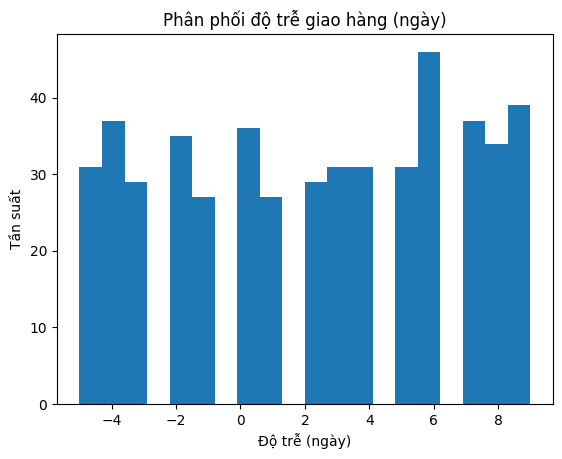

In [4]:
plt.figure()
plt.hist(df['Delay in days'], bins=20)
plt.title('Phân phối độ trễ giao hàng (ngày)')
plt.xlabel('Độ trễ (ngày)')
plt.ylabel('Tần suất')
plt.show()

In [5]:
# Mã hóa nhãn Delivery Status thành số
le = LabelEncoder()
df['Delivery Status Encoded'] = le.fit_transform(df['Delivery Status'])

# Chọn biến đầu vào và biến mục tiêu
features = [
    "Client ID", "Order cost", "Order quantity", "Delay in days",
    "Non-compliance quantity", "Non-compliance level",
    "Delivered quantity", "Remaining quantity",
    "Administrator ID", "Delivery ID"
]
X = df[features]
y = df['Delivery Status Encoded']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
selector = SelectKBest(score_func=f_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [8]:
selected_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_indices]
print("Các biến được chọn:", selected_features, "\n")

Các biến được chọn: ['Order quantity', 'Delay in days', 'Non-compliance quantity', 'Non-compliance level', 'Remaining quantity', 'Administrator ID', 'Delivery ID'] 



In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test_selected)
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred), "\n")
print("Báo cáo phân loại (Classification Report):\n",
      classification_report(y_test, y_pred, target_names=le.classes_), "\n")

Độ chính xác (Accuracy): 0.99 

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

       Early       0.97      1.00      0.99        33
        Late       1.00      1.00      1.00        56
     On time       1.00      0.91      0.95        11

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100
 



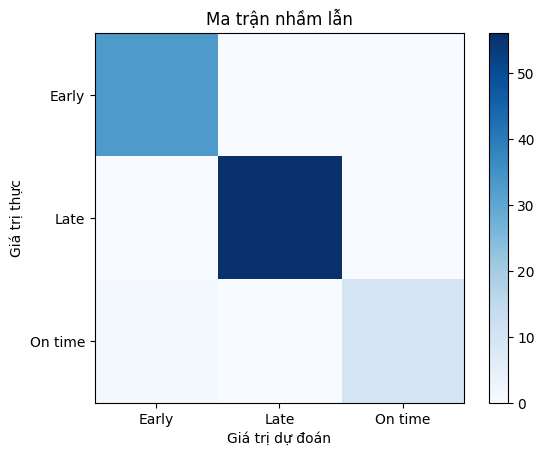

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực')
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_)
plt.yticks(tick_marks, le.classes_)
plt.show()

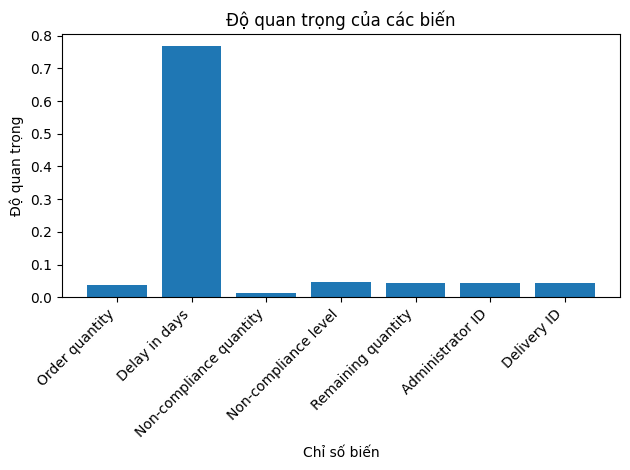

In [12]:
importances = clf.feature_importances_
plt.figure()
plt.bar(np.arange(len(importances)), importances)
plt.title('Độ quan trọng của các biến')
plt.xlabel('Chỉ số biến')
plt.ylabel('Độ quan trọng')
plt.xticks(np.arange(len(importances)), selected_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()